In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
plt.rcParams['figure.dpi'] = 400
import numpy as np

vaccine_rename = {'Mosaic-8b in naïve NHPs' : "Mosaic-8b\nprime & boost",
                  'Mosaic-8b in prevaxxed NHPs': "Mosaic-8b\nboost",
                  'Homotypic SARS-2 Beta in prevaxxed NHPs':  "Homotypic\nboost",
                  'WA.1/BA.5 mRNA in prevaxxed NHPs': "Bivalent mRNA\nboost"}

In [17]:
df = pd.read_csv("../Data/Supp_TableS8_NHP_neutralization.csv")
df = df.replace("<20", 10)

cols = df.filter(regex= "ID50").columns.tolist()
df = df[["Sample ID", "Label"] + cols].copy()

for c in cols:
    try:
        df[c] = df[c].str.replace(',', '').astype(int)
    except:
        pass

df.columns = [i.split("/")[0] for i in df.columns]
df_id50 = df.melt(["Sample ID", "Label"], var_name = "construct", value_name = "ID50")
df_id50["Label"] = df_id50.Label.replace(vaccine_rename)

In [4]:
df2 = df.groupby("Label").agg(stats.gmean)
df2 = np.log10(df2)

<ipython-input-4-4f7549bf13fe>:1: FutureWarning: ['Sample ID'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df2 = df.groupby("Label").agg(stats.gmean)


In [8]:
df_voc  = df2[[i for i in df2.columns if "-" not in i]]
df_desi = df2.filter(regex = "-")

In [11]:
# Helper function to plot each team on the radar chart.
def add_to_radar(df, teams, color):
    group_1 = df.loc[teams].tolist()
    group_1 += group_1[:1] #same here duplicate first value to close the radar
    ax.plot(label_loc, group_1, color=color, linewidth=1, label=teams)
    ax.fill(label_loc, group_1, color=color, alpha=0.15)


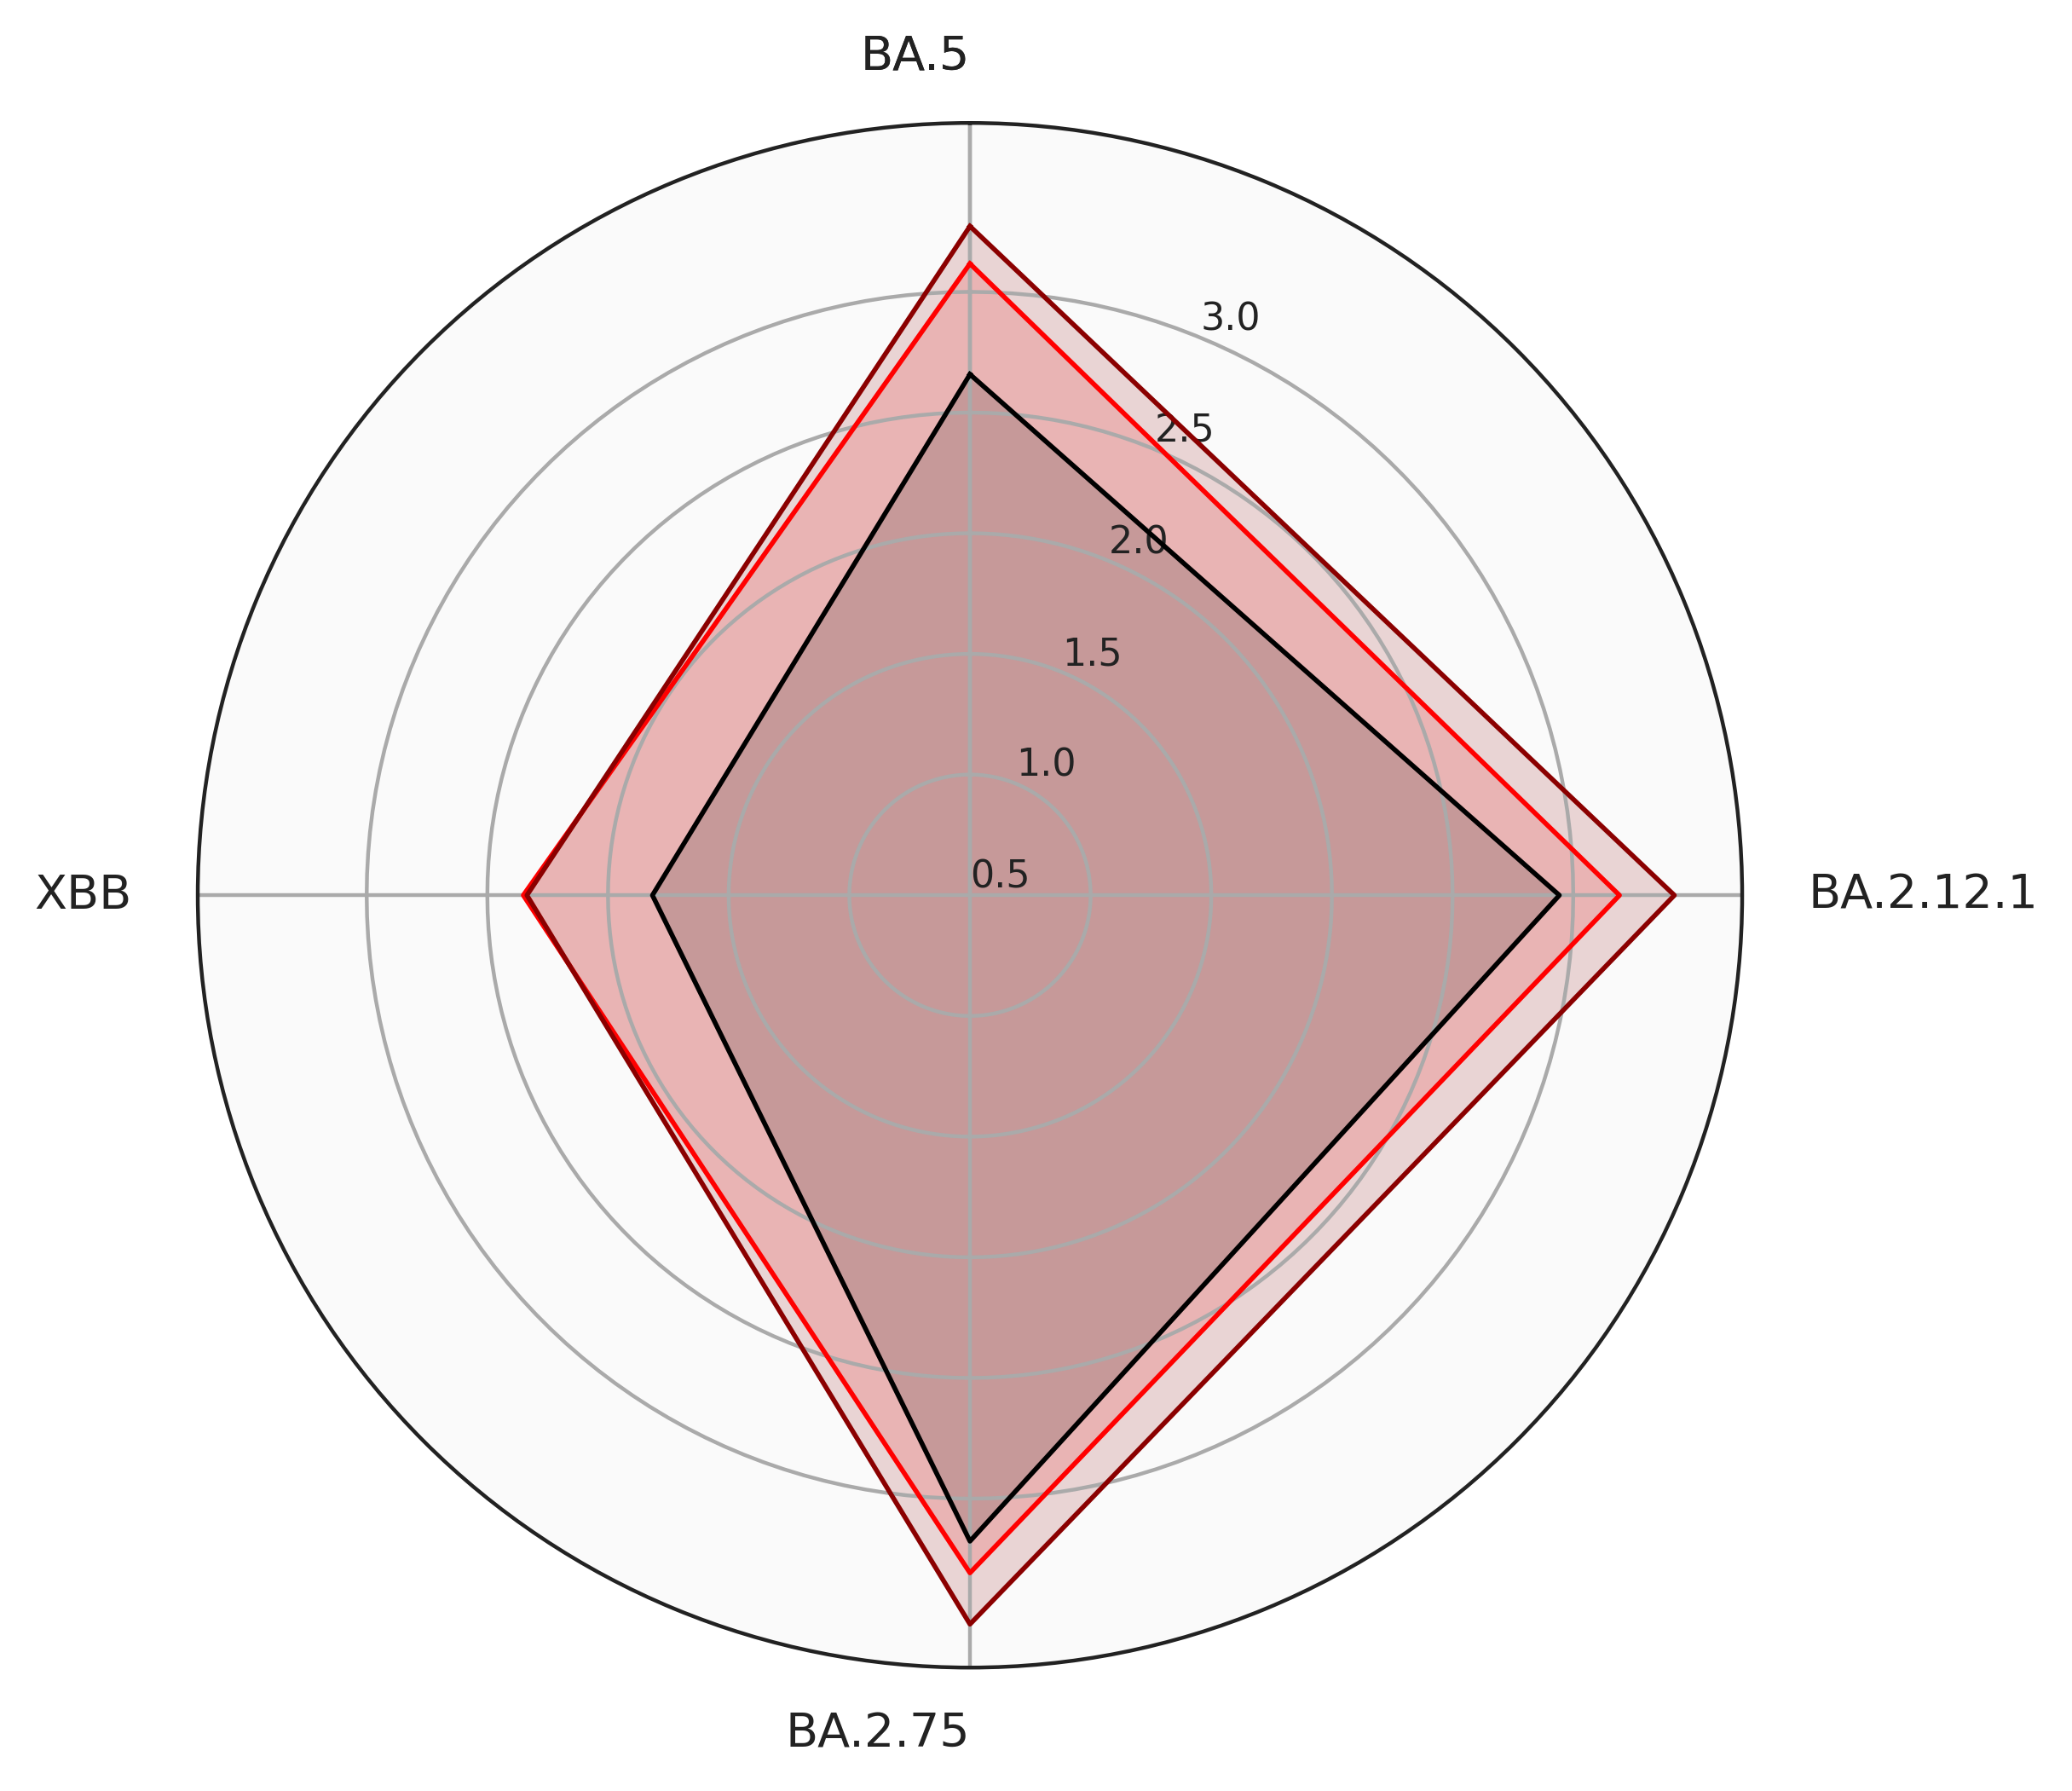

In [12]:
df = df_voc[['BA.5', 'BA.2.12.1', 'BA.2.75',  'XBB']]

# Each attribute we'll plot in the radar chart.
cat = list(df.columns)
cat += cat[:1]  #to close the radar, duplicate the first column
n_points = len(cat)

#As we have 5 categories the radar chart shoud have 5 radial axis
# To find out the angle of each quadrant we divide 360/5 = 72 degrees
#angles need to be converted to radian so we multiply by 2*pi and create the list of angles:
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(cat))

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True), facecolor="white")

# Add each car to the chart.
add_to_radar(df, 'Homotypic SARS-2 Beta in prevaxxed NHPs', 'red')
add_to_radar(df, 'Mosaic-8b in prevaxxed NHPs', 'darkred')
add_to_radar(df, 'WA.1/BA.5 mRNA in prevaxxed NHPs','k' )


# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)


# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(label_loc), cat)

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), label_loc):
    if 0 < angle < np.pi:
        label.set_horizontalalignment('left')
    else:
        label.set_horizontalalignment('right')
    
# Ensure radar goes from 0 to 100.
ax.set_ylim(1, 3.7)
# You can also set gridlines manually like this:
ax.set_rgrids([0.5, 1, 1.5, 2, 2.5, 3,])

# Add some custom styling.
# Change the color of the tick labels.
ax.tick_params(colors='#222222')

# Make the y-axis (0-100) labels smaller.
ax.tick_params(axis='y', labelsize=8)
# Change the color of the circular gridlines.
ax.grid(color='#AAAAAA')
# Change the color of the outermost gridline (the spine).
ax.spines['polar'].set_color('#222222')
# Change the background color inside the circle itself.
ax.set_facecolor('#FAFAFA')

# # Add title.
# ax.set_title('Steph curry popcorn rating', y=1.08)

# Add a legend as well.
#ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.savefig('../Figures/Fig4b_radial_nhp_voc.svg', format='svg', layout = "tight")

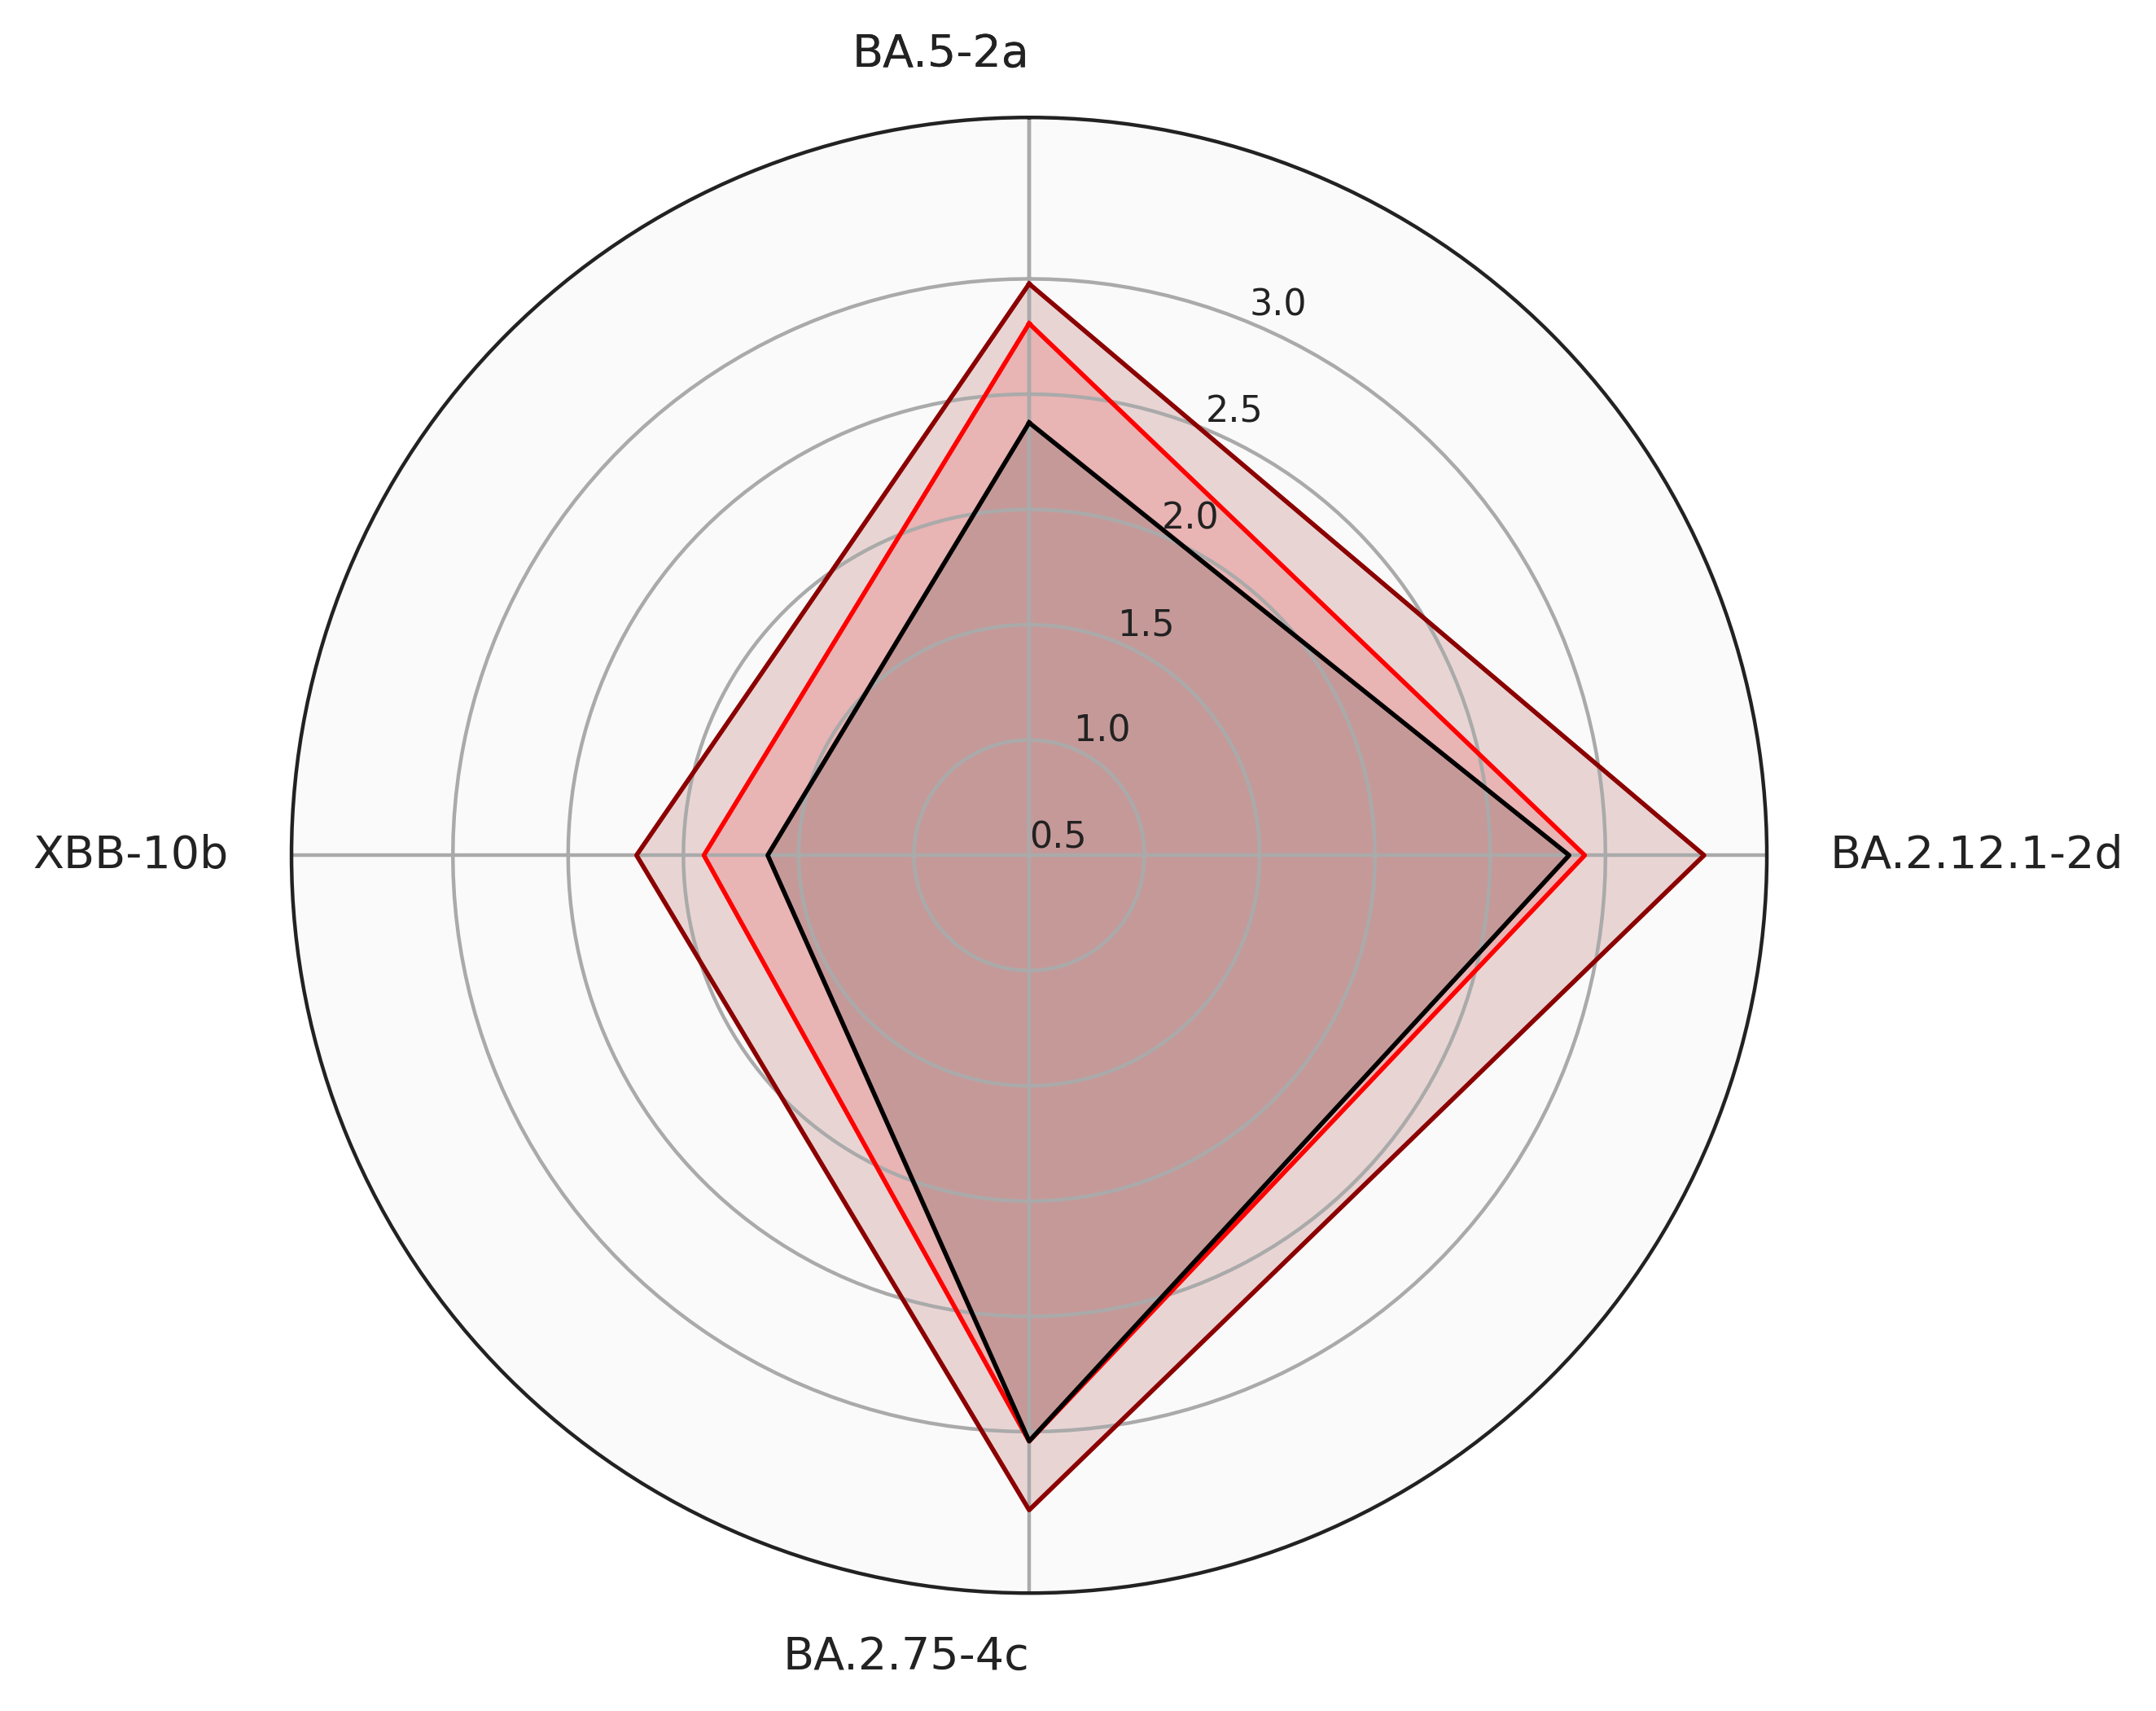

In [15]:
df = df_desi[['BA.5-2a', 'BA.2.12.1-2d', 'BA.2.75-4c',  'XBB-10b']]

# Each attribute we'll plot in the radar chart.
cat = list(df.columns)
cat += cat[:1]  #to close the radar, duplicate the first column
n_points = len(cat)

#As we have 5 categories the radar chart shoud have 5 radial axis
# To find out the angle of each quadrant we divide 360/5 = 72 degrees
#angles need to be converted to radian so we multiply by 2*pi and create the list of angles:
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(cat))

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True), facecolor="white")

# Add each car to the chart.
add_to_radar(df, 'Homotypic SARS-2 Beta in prevaxxed NHPs', 'red')
add_to_radar(df, 'Mosaic-8b in prevaxxed NHPs', 'darkred')
add_to_radar(df, 'WA.1/BA.5 mRNA in prevaxxed NHPs','k' )


# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)


# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(label_loc), cat)

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), label_loc):
    if 0 < angle < np.pi:
        label.set_horizontalalignment('left')
    else:
        label.set_horizontalalignment('right')
    
# Ensure radar goes from 0 to 100.
ax.set_ylim(1, 3.7)
# You can also set gridlines manually like this:
ax.set_rgrids([0.5, 1, 1.5, 2, 2.5, 3,])


# Add some custom styling.
# Change the color of the tick labels.
ax.tick_params(colors='#222222')

# Make the y-axis (0-100) labels smaller.
ax.tick_params(axis='y', labelsize=8)
# Change the color of the circular gridlines.
ax.grid(color='#AAAAAA')
# Change the color of the outermost gridline (the spine).
ax.spines['polar'].set_color('#222222')
# Change the background color inside the circle itself.
ax.set_facecolor('#FAFAFA')

# # Add title.
# ax.set_title('Steph curry popcorn rating', y=1.08)

# Add a legend as well.
#ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.savefig('../Figures/Fig4c_radial_nhp_desi.svg', format='svg', layout = "tight")